In [1]:
def grad(w):
    grad_ = 0
    for i in range(len(y)):
        grad_ += -y[i] / (1 + np.exp(y[i] * (X[:,[i]].T@w)))*X[:,[i]]
    return grad_ + 2 * w

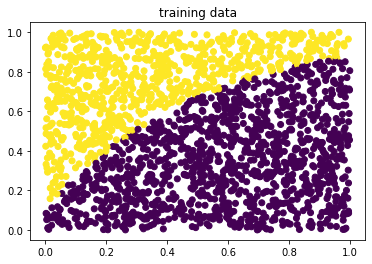

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

#2a
The logistic loss function places more emphasis on correctly classifing examples that are close to the decision boundary. If our model misclassifies then the number is very large (greater penalty for misclassifications)

In [3]:

w = np.zeros((np.size(x_train, axis = 1) , 1))
tau = 1 / (np.linalg.norm(x_train, ord=2)**2)
z = w - tau * (x_train.T) @ (x_train @ w - y_train)
XT = np.hstack((x_train, np.ones((n_train,1))))
X = XT.T
y= np.squeeze(y_train)

max_its = 5000
t = .001

w = np.zeros((3,1))

w_new = w - tau*grad(w)
it = 1

while np.linalg.norm(w-w_new) > .001 and it < max_its :
    w = w_new
    w_new = w - tau*grad(w)
    it +=1
    
    



In [4]:
y_train

array([[ 1],
       [ 1],
       [-1],
       ...,
       [-1],
       [ 1],
       [ 1]], dtype=int16)

In [5]:
np.squeeze(y_train)

array([ 1,  1, -1, ..., -1,  1,  1], dtype=int16)

In [6]:
n_train

2000

In [7]:
w

array([[-6.34291062],
       [ 9.07409463],
       [-2.51575002]])

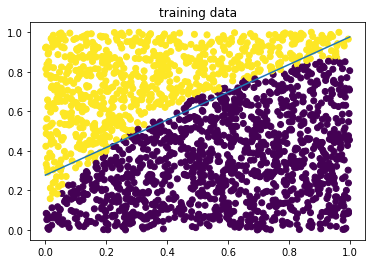

In [8]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')

slope = -w[0,0] / w[1,0]
y_int = -w[2,0] / w[1,0]

plt.plot([0,1], [y_int, y_int + slope])
plt.show()

## error rate

In [9]:
np.mean(y_train != np.sign(X.T@w))

0.035

In [22]:
#2e)
w1 = np.zeros((3,1))
val = 1
next = w1 - tau * grad(w)
it = 1

while val > .001 and it < 1200:
    w1 = next
    next = (w1 - tau * X @ (XT @ w1 - y_train)) / (1 + (1 * tau))
    val = np.linalg.norm(w1 - next)
    it += 1
    


In [23]:
print(w1)


[[1.23701741e+261]
 [1.25245028e+261]
 [2.37802579e+261]]
